# ANALISIS DE DATOS - APRENDIZAJE NO SUPERVISADO

In [327]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings   # Mensajes de advertencia 
warnings.filterwarnings('ignore')

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [329]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('Documents/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [330]:
dataset.shape # tamaño del dataset

(200, 5)

In [331]:
data=dataset.drop(['CustomerID'], axis=1)  # Eliminamos la columna CustomerID no es relevante

In [332]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [333]:
data.describe() # estadistica del dataset

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [335]:
data.isna().sum()  # Verificar valores Nulos

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [336]:
data.dropna() # Elimina columnas con valores nulos, para este caso no hay. 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [338]:
# Filtrar columnas del modelo 

Datos = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [339]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


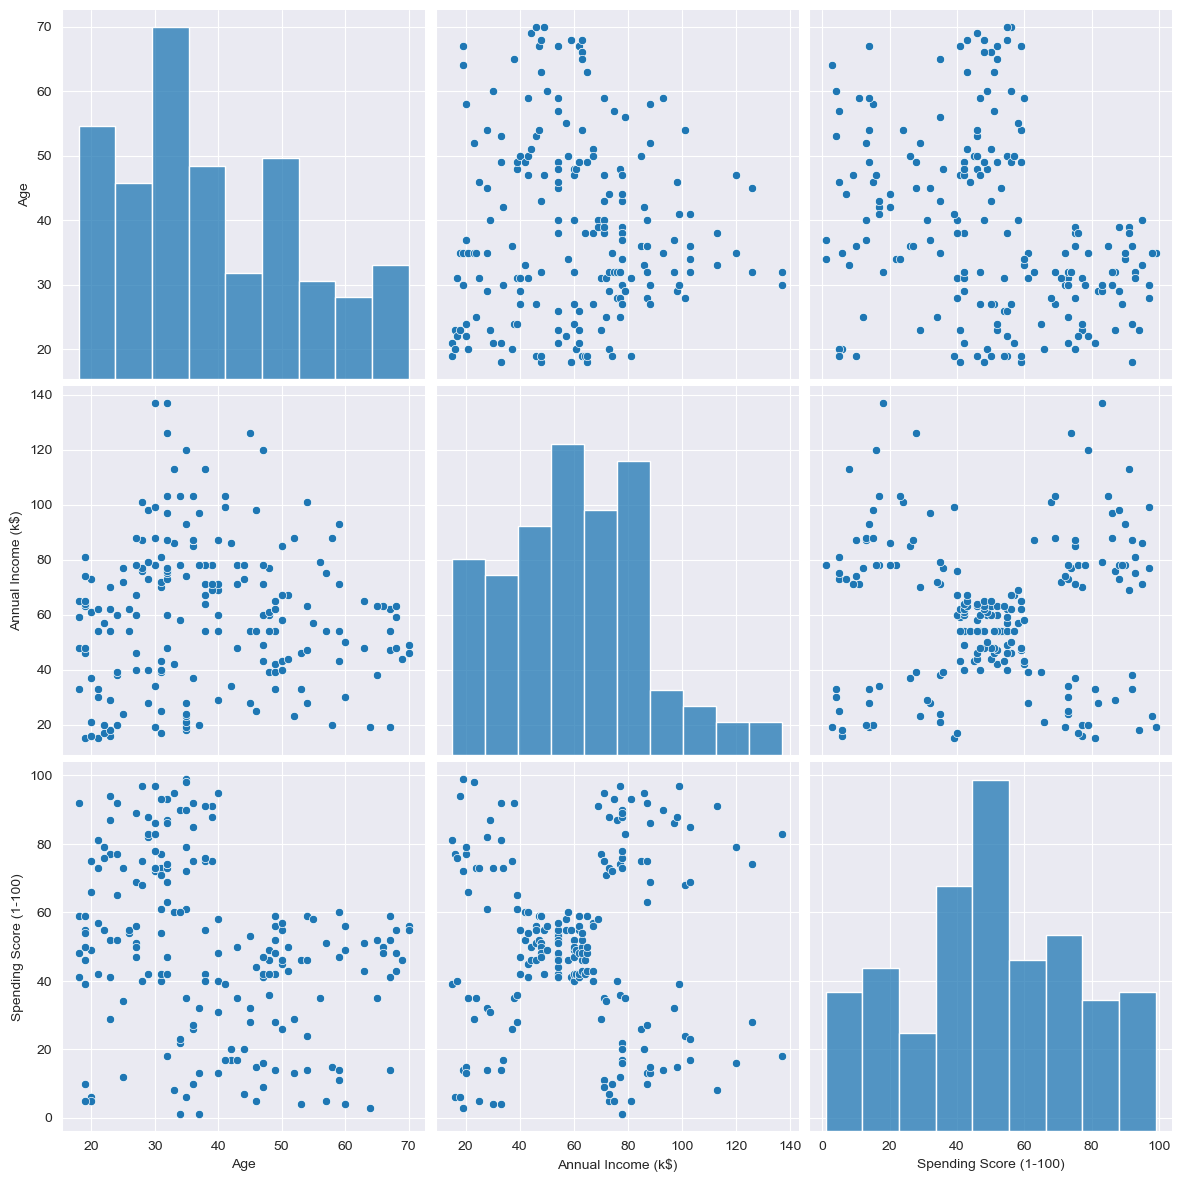

In [340]:
sns.pairplot(Datos.dropna(), size=4,kind='scatter') # Diagramas para analizar posibles correlaciones entre variables

In [341]:
# Matriz de correlación
corr_matrix = Datos.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

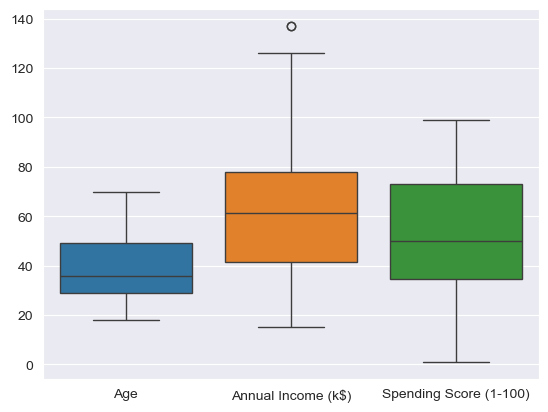

In [342]:
# Diagramas de caja para cada variable
sns.boxplot(data=Datos)

In [343]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Datos), columns = Datos.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [344]:
X.describe() # estadistica del dataset

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


# 4. Entrenar el modelo configurando los diferentes hiperparámetros. K-MEANS

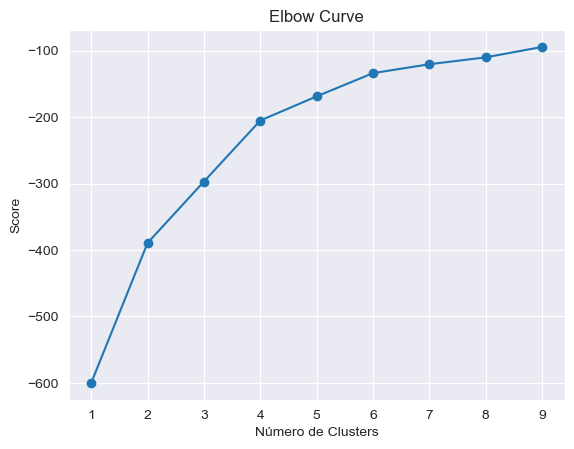

In [346]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')  # Metodo del codo, se busca donde la grafica no cambia
plt.show()

In [347]:
kmeans = KMeans(n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 0.47895722, -1.30822992, -1.19644353],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.99396865, -1.34734766,  1.06404834],
       [-0.85043527, -0.14894113, -0.04147777]])

# 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [349]:
# Calcular medidas de calidad para K-Means

print("Medidas de calidad para K-Means:")
print("Puntaje de Silhouette:", metrics.silhouette_score(X, labels))   # ideal a 1
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels)) # separacion de los clusters
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_) # valor bajo mejor clasificacion
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))  # valor bajo mejor separacion 

Medidas de calidad para K-Means:
Puntaje de Silhouette: 0.4268547747113388
Índice de Calinski-Harabasz: 135.07554292793952
Inertia (suma de cuadrados dentro de los clusters): 133.88887021131026
Davies-Bouldin Index: 0.8238802468310343


# 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [351]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','black','orange','blue','violet']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

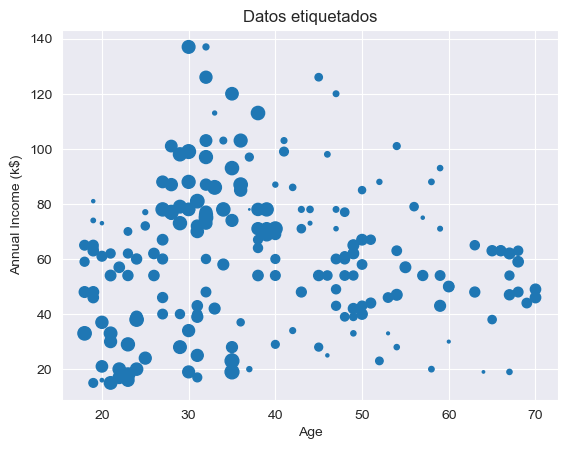

In [352]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Age'], Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'])
plt.xlabel('Age')
plt.title('Datos etiquetados')
plt.ylabel('Annual Income (k$)')
plt.show()

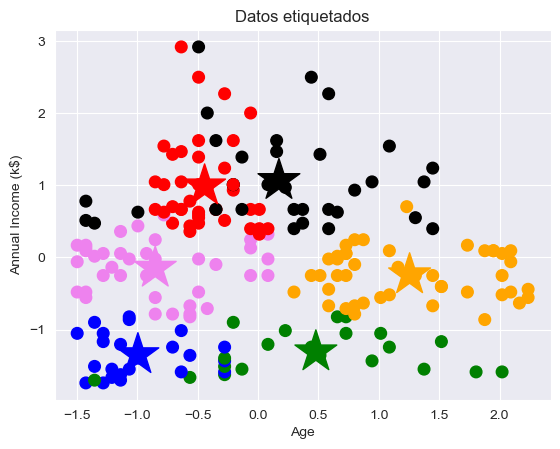

In [353]:
# 1
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# 7. Interpretar, analizar y documentar los resultados obtenidos.

Conclusiones del modelo:

Coeficiente de Silhouette: La puntuación de Silhouette es de aproximadamente 0,410 lo mejor es que se aproxime a 1, indica una buena cantidad de separación entre los clusters. Estos es porque son algo distintos en grupos, pero puede haber ligeras superposiciones entre ellos.

Índice de Calinski-Harabasz: La puntuación de Calinski Harabasz es de 124.010, que es aceptablemente, lo que indica que los clústeres están bien definidos. Una puntuación más alta en esta métrica generalmente indica mejores definiciones de clúster, lo que implica que nuestra agrupación en clústeres ha logrado encontrar una estructura sustancial en los datos.

Indice Davies Bouldin: La puntuación de Davies Bouldin de 0,874 es una puntuación razonable, lo que indica un nivel moderado de similitud entre cada grupo y el más similar. Una puntuación más baja es generalmente mejor, ya que indica menos similitud entre los clústeres y, por lo tanto, nuestra puntuación aquí sugiere una separación entre los grupos